In [1]:
cd ../..

/home/msi/projects/diplomka


In [2]:
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import glob
from pprint import pprint

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set_style("darkgrid")
sns.set_context("paper")

In [4]:
alerts = pd.read_json("data/alarms.json")

In [5]:
pprint(alerts.sample()["source"].iloc[0])

{'alarm_id': '14dc50bded9b64cc776126392aa2c1295bbb0ba8e4b72fdf0b61d110',
 'asn': 3257,
 'from': '2023-02-13 17:13',
 'num_pairs': '16',
 'owner': 'GTT-BACKBONE GTT, US',
 'sites': ['GRIF-IRFU', 'SAMPA', 'IN2P3-CPPM', 'IN2P3-LAPP', 'SARA-MATRIX'],
 'to': '2023-02-14 17:13'}


In [6]:
alerts["owner"] = alerts["source"].apply(lambda x: x["owner"])

In [7]:
alerts["num_sites"] = alerts["tags"].apply(lambda x: len(set(x)))

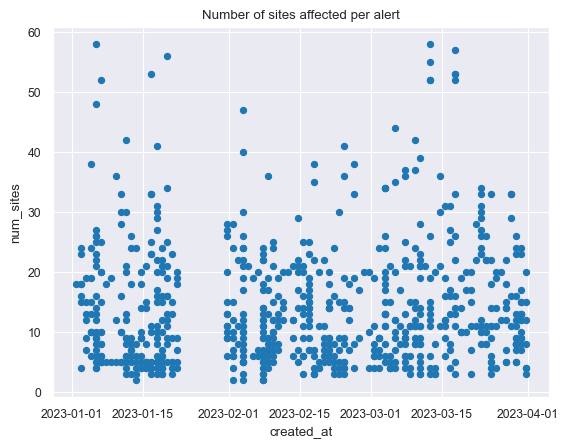

In [8]:
alerts.plot(kind='scatter', x='created_at', y="num_sites", title="Number of sites affected per alert");

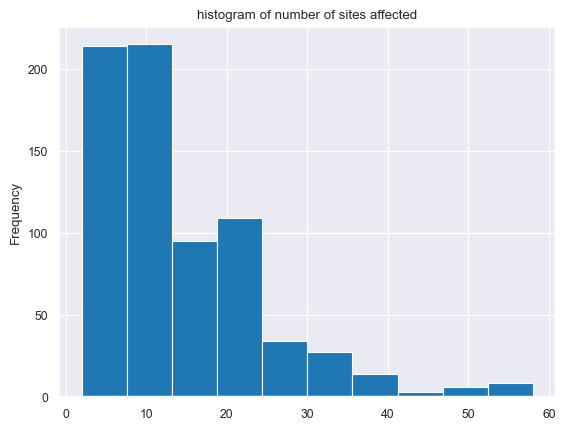

In [9]:
alerts["num_sites"].plot(kind='hist', title="histogram of number of sites affected");

In [10]:
len(set(alerts["tags"].sum()))

97

In [11]:
import wordcloud
from collections import Counter
import matplotlib.pyplot as plt

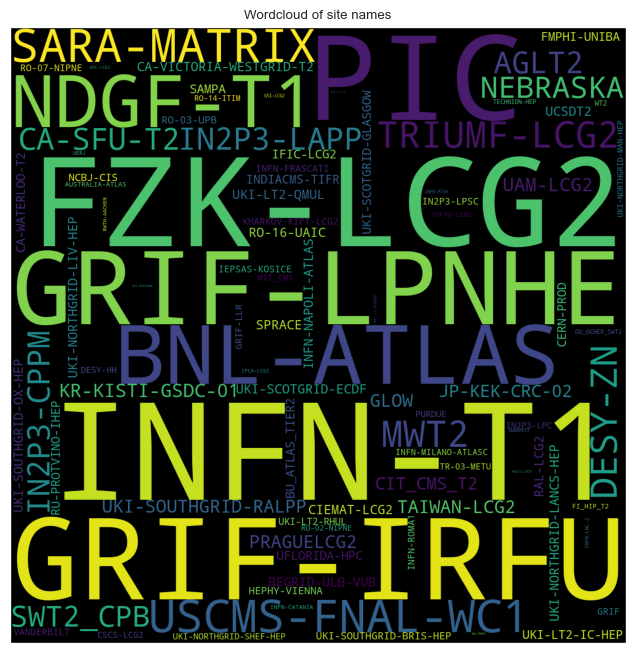

In [12]:
counter = Counter(alerts["tags"].sum())
total = sum(counter.values())
freq = {k:v/total for k,v in counter.items()}
wc = wordcloud.WordCloud(width=1200, height=1200)
wc.fit_words(freq)

fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.grid(False)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax.imshow(wc)
plt.title("Wordcloud of site names")
plt.show()

In [13]:
[x[0] for x in counter.most_common(25)]

['INFN-T1',
 'FZK-LCG2',
 'PIC',
 'GRIF-IRFU',
 'GRIF-LPNHE',
 'BNL-ATLAS',
 'NDGF-T1',
 'SARA-MATRIX',
 'USCMS-FNAL-WC1',
 'TRIUMF-LCG2',
 'MWT2',
 'DESY-ZN',
 'IN2P3-LAPP',
 'IN2P3-CPPM',
 'CA-SFU-T2',
 'AGLT2',
 'NEBRASKA',
 'SWT2_CPB',
 'KR-KISTI-GSDC-01',
 'UAM-LCG2',
 'TAIWAN-LCG2',
 'GLOW',
 'PRAGUELCG2',
 'UKI-SOUTHGRID-RALPP',
 'JP-KEK-CRC-02']

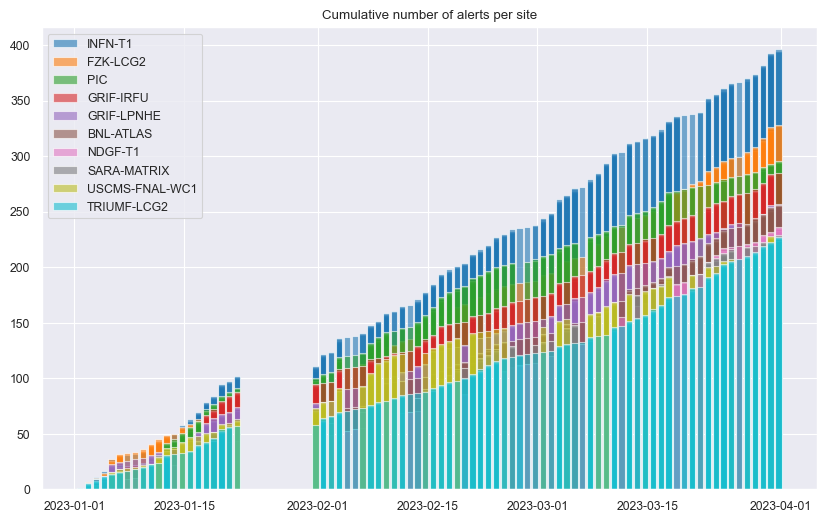

In [14]:
import matplotlib.pyplot as plt
import numpy as np 


fig = plt.figure(figsize=(10, 6))
for site, _ in counter.most_common(10):
    site_idx = []
    cnt = []
    for idx, row in alerts.set_index("created_at").sort_index().iterrows():
        if site in row["tags"]:
            site_idx.append(idx)
            cnt.append(1)
            

    plt.bar(site_idx, np.cumsum(cnt), label=site, alpha=0.6 )

plt.title("Cumulative number of alerts per site")
plt.legend()
plt.show()

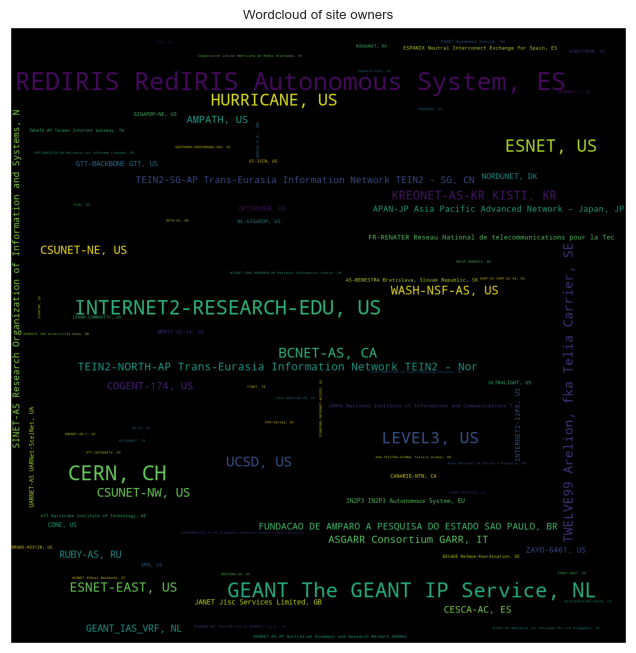

In [15]:
counter = Counter(alerts["owner"])
total = sum(counter.values())
freq = {k:v/total for k,v in counter.items()}
wc = wordcloud.WordCloud(width=1200, height=1200)
wc.fit_words(freq)
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.grid(False)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax.imshow(wc)
plt.title("Wordcloud of site owners")
plt.show()

In [16]:
tmp = pd.DataFrame(freq, index=['frequency']).T.sort_values(by='frequency', ascending=False)

In [17]:
fig = tmp.plot(kind='bar', backend='plotly') 
fig.update_layout(width=1200, height=600, title="Frequency of site owners")

In [18]:
tmp.reset_index(inplace=True)
tmp['state'] = tmp["index"].str.split(', ').apply(lambda x: x[-1])
tmp.set_index('index', inplace=True)

In [19]:
X = (tmp.groupby('state')['frequency'].sum())
X[X.index.str.len() < 10].sort_values(ascending=False).plot(kind='bar', title='Alerts per state', backend='plotly')

In [20]:
for col in ["from", "to", "num_pairs", "asn"]:
    alerts[col] = alerts["source"].apply(lambda x: x[col])

In [21]:
for col in ["from", "to"]:
    alerts[col] = pd.to_datetime(alerts[col])

In [22]:
alerts["from_dt"] = alerts["from"].dt.dayofweek#.hist(bins=7)

In [23]:
alerts["to_dt"] = alerts["to"].dt.dayofweek#.hist(bins=7)

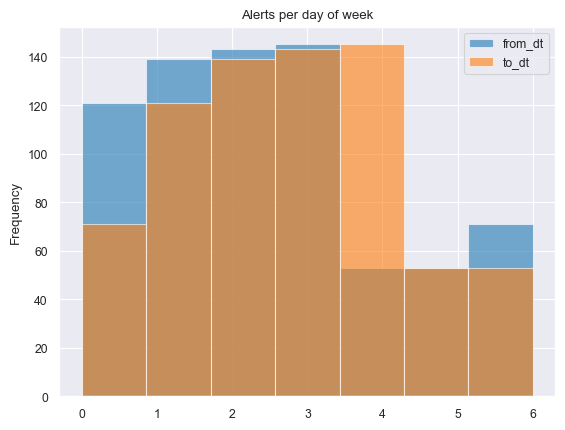

In [24]:
alerts[["from_dt", "to_dt"]].plot(kind='hist', bins=7, alpha=0.6, title="Alerts per day of week");

In [25]:
alerts["hod"] = alerts["from"].dt.hour + 1

In [26]:
alerts["dow"] = alerts["from"].dt.dayofweek + 1

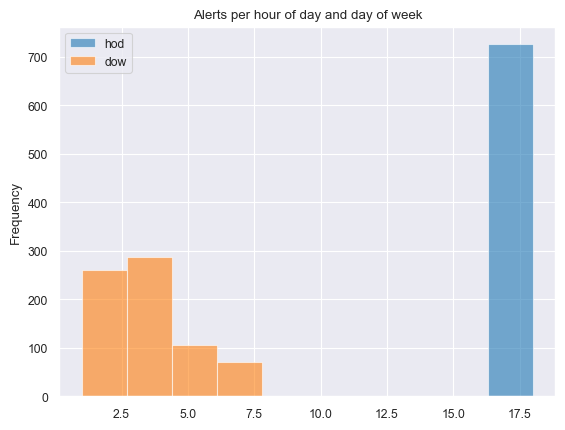

In [27]:
alerts[["hod", "dow"]].plot(title='Alerts per hour of day and day of week', kind='hist', bins=10, alpha=0.6);

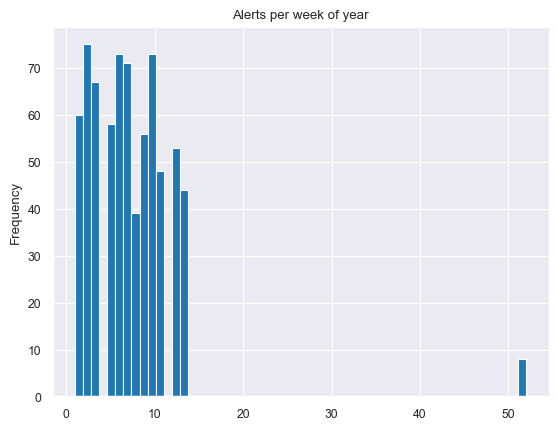

In [28]:
alerts["from"].dt.isocalendar().week.plot(bins=56, kind='hist', title="Alerts per week of year");